**Loading Bowlers dataset**

In [1]:
import pandas as pd

# Assuming your CSV file is named 'bowlers_dataset.csv'
file_path = 'Bowler dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.rename(columns={'Role': 'Role_of_player'})
df.columns = df.columns.str.strip()

# Display the first few rows of the DataFrame to check the structure
print(df.head())

# for column in df.columns:
#     print(column)

            Player Team Role_of_player    Nationality  Mat  Inns    Ov  Runs  \
0      Abdul Samad  SRH    All Rounder  Indian origin   23     4   8.0   105   
1   Abhishek Nayar  CSK         Bowler  Indian origin    4     1   1.0    16   
2  Abhishek Sharma  SRH    All Rounder  Indian origin   19    14  22.0   176   
3       Adam Milne  CSK    All Rounder       Overseas    9     9  32.0   308   
4       Adam Zampa  RCB    All Rounder       Overseas   14    14  47.5   370   

   Wkts        Avg       Econ         SR  
0     2  52.500000  11.355000  24.000000  
1     0   0.000000  16.000000   0.000000  
2     7  27.500000   8.666667  19.000000  
3     7  43.773333   9.890000  26.666667  
4    21  26.286667   7.776667  19.500000  


**Converting to numerical values (One-hot label encoding)**

In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# Assuming df is your DataFrame with bowler stats

# Define functions to map categories to numerical values
def encode_role(role):
    if role == 'Bowler':
        return 0
    elif role == 'All Rounder':
        return 1
    else:
        return -1  # Add a default value for unexpected roles

def encode_nationality(nationality):
    if nationality == 'Overseas':
        return 0
    elif nationality == 'Indian origin':
        return 1
    else:
        return -1  # Add a default value for unexpected nationalities

# Handle missing values (example)
df['Role_of_player'].fillna('Unknown', inplace=True)

# Apply the encoding functions
df['Role_Encoded'] = df['Role_of_player'].apply(encode_role)
df['Nationality_Encoded'] = df['Nationality'].apply(encode_nationality)

# Features (X): All columns except 'Player', 'Team', and original categorical columns
X = df.drop(columns=['Player', 'Team', 'Role_of_player', 'Nationality'])

# Target variables (y): 'Econ' and 'Wkts'
y_econ = df['Econ']
y_wkts = df['Wkts']

# Initialize the Gradient Boosting Regressor for economy
model_econ = GradientBoostingRegressor()
# Train the model for economy
model_econ.fit(X, y_econ)
# Make predictions for all players' economy
df['Predicted_Econ'] = model_econ.predict(X)

# Initialize the Gradient Boosting Regressor for wickets
model_wkts = GradientBoostingRegressor()
# Train the model for wickets
model_wkts.fit(X, y_wkts)
# Make predictions for all players' wickets
df['Predicted_Wkts'] = model_wkts.predict(X)

# Combine both predictions with weights (adjust weights as needed)
weight_econ = 0.7
weight_wkts = 0.3
df['Combined_Score'] = (weight_econ * df['Predicted_Econ']) + (weight_wkts * df['Predicted_Wkts'])

# Filter players who have bowled over 50 overs
df_filtered = df[df['Ov'] > 30]

# Sort the filtered DataFrame based on the combined score in descending order
df_bowlers_sorted = df_filtered.sort_values(by='Combined_Score', ascending=False)

# Display the sorted DataFrame
# print(df_bowlers_sorted['Role_Encoded'])
print(df_bowlers_sorted[['Player', 'Role_Encoded', 'Nationality_Encoded', 'Team', 'Ov', 'Predicted_Econ', 'Predicted_Wkts', 'Combined_Score']])



                  Player  Role_Encoded  Nationality_Encoded  Team     Ov  \
48          Dwayne Bravo             1                    0   CSK  429.8   
11           Amit Mishra             0                    1    DC  492.7   
135  Ravichandran Ashwin             0                    1    RR  581.8   
181     Yuzvendra Chahal             0                    1    RR  407.2   
25     Bhuvneshwar Kumar             0                    1   SRH  451.9   
..                   ...           ...                  ...   ...    ...   
58             Ish Sodhi             1                    0    RR   30.1   
177          Virat Kohli             1                    1   RCB   41.1   
55         Harpreet Brar             1                    1  PBKS   32.0   
66          Jayant Yadav             0                    1    DC   61.0   
161         Suresh Raina             0                    1   CSK   35.0   

     Predicted_Econ  Predicted_Wkts  Combined_Score  
48         8.278557      151.9783

In [3]:
df_bowlers_sorted.to_csv("Bowlers Updated DataSet with Combined Score.csv", index=False)

**Loading Batsmen Dataset**

In [4]:
import pandas as pd

# Assuming your CSV file is named 'bowlers_dataset.csv'
file_path = 'Batsmen dataset.csv'

# Read the CSV file into a DataFrame
df_batsmen = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check the structure
print(df_batsmen.head(10))


           Player  Team         Role    Nationality  Mat  Inns  Runs  \
0     Virat Kohli   RCB      Batsmen  Indian origin  159   158  5366   
1    Rohit Sharma    MI      Batsmen  Indian origin  164   160  4412   
2        MS Dhoni   CSK   Batsmen/WK  Indian origin  174   152  3769   
3    David Warner    DC  All Rounder       Overseas  124   124  4748   
4  Shikhar Dhawan  PBKS      Batsmen  Indian origin  162   162  4984   
5    Sanju Samson    RR   Batsmen/WK  Indian origin  121   117  3068   
6    Rishabh Pant    DC   Batsmen/WK  Indian origin   84    84  2498   
7   Andre Russell   KKR  All Rounder       Overseas   84    70  1700   
8        KL Rahul   LSG   Batsmen/WK  Indian origin   94    85  3273   
9   Ambati Rayudu   CSK      Batsmen  Indian origin  109   102  2567   

         Avg          SR  50   4s   6s  Role_Encoded  Nationality_Encoded  \
0  40.425455  128.494545  38  465  181             0                    1   
1  31.937273  131.835454  33  394  177             0 

**Converting to numerical values (One-hot label encoding)**

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


# Define functions to map categories to numerical values
def encode_role(role):
    if role == 'Batsmen':
        return 0
    elif role == 'Batsmen/WK':
        return 1
    elif role == 'All Rounder':
        return 2
    else:
        return -1  # Add a default value for unexpected roles

def encode_nationality(nationality):
    if nationality == 'Overseas':
        return 0
    elif nationality == 'Indian origin':
        return 1
    else:
        return -1  # Add a default value for unexpected nationalities

# Apply the encoding functions
df_batsmen['Role_Encoded'] = df_batsmen['Role'].apply(encode_role)
df_batsmen['Nationality_Encoded'] = df_batsmen['Nationality'].apply(encode_nationality)

# Features (X): All columns except 'Avg', 'SR', 'Player', and 'Team'
X_batsmen = df_batsmen.drop(columns=['Avg', 'SR', 'Player', 'Team','Role', 'Nationality'])

# Target variable for average (y): 'Avg'
y_avg = df_batsmen['Avg']

# Step 1: Initialize Linear Regression
linear_model = LinearRegression()

# Step 2: Train Linear Regression model
linear_model.fit(X_batsmen, y_avg)

# Step 3: Get predicted average from Linear Regression model
df_batsmen['Predicted_Avg'] = linear_model.predict(X_batsmen)

# Initialize the Gradient Boosting Regressor for strike rate
model_sr = GradientBoostingRegressor()

# Target variable for strike rate (y): 'SR'
y_sr = df_batsmen['SR']

# Train the model for strike rate
model_sr.fit(X_batsmen, y_sr)

# Make predictions for all batsmen's strike rate
df_batsmen['Predicted_SR'] = model_sr.predict(X_batsmen)

# Combine both predictions with weights (adjust weights as needed)
weight_avg = 0.7
weight_sr = 0.3
df_batsmen['Combined_Score'] = (weight_avg * df_batsmen['Predicted_Avg']) + (weight_sr * df_batsmen['Predicted_SR'])

# Filter batsmen who have played over 20 innings
df_batsmen_filtered = df_batsmen[df_batsmen['Inns'] > 20]

# Sort the filtered DataFrame based on the combined score in descending order
df_batsmen_sorted = df_batsmen_filtered.sort_values(by='Combined_Score', ascending=False)

# Display the sorted DataFrame
print(df_batsmen_sorted[['Player', 'Team', 'Role_Encoded', 'Nationality_Encoded','Mat' ,'Inns','Predicted_Avg', 'Predicted_SR', 'Combined_Score']])


               Player  Team  Role_Encoded  Nationality_Encoded  Mat  Inns  \
0         Virat Kohli   RCB             0                    1  159   158   
3        David Warner    DC             2                    0  124   124   
8            KL Rahul   LSG             1                    1   94    85   
6        Rishabh Pant    DC             1                    1   84    84   
11        Jos Buttler    RR             1                    0   65    64   
..                ...   ...           ...                  ...  ...   ...   
75      Hanuma Vihari   SRH             2                    1   24    23   
77       Mohit Sharma  PBKS             2                    1   70    25   
80     Sandeep Sharma  PBKS             2                    1   95    24   
78  Bhuvneshwar Kumar   SRH             2                    1  117    41   
79        Amit Mishra    DC             2                    1  108    35   

    Predicted_Avg  Predicted_SR  Combined_Score  
0       51.624080    129.

In [6]:
df_batsmen_sorted.to_csv("Batsmen Updated DataSet1 with Combined Score.csv", index=False)

**Final Output of players**

In [9]:
import pandas as pd

# List of 22 players
players_list = [
    "Virat Kohli","Faf du Plessis","Rajat Patidar","Glenn Maxwell","Cameron Green","Anuj Rawat","Dinesh Kartik","Karn Sharma","Alzarri Joseph","Mayank Dagar","Mohammed Siraj","Ruturaj Gaikwad","Rachin Ravindra","Ajinkya Rahane","Daryl Mitchell","Ravindra Jadeja","Sameer Rizvi","MS Dhoni","Deepak Chahar","Maheesh Theekshana","Tushar Deshpande","Mustafizur Rahman"
]

# Assuming your CSV file is named 'bowlers_dataset.csv'
file_path_bowlers = 'Bowlers Updated DataSet with Combined Score.csv'
# Assuming your CSV file is named 'batsmen_dataset.csv'
file_path_batsmen = 'Batsmen Updated DataSet1 with Combined Score.csv'

# Read the CSV file into DataFrames
df_bowlers = pd.read_csv(file_path_bowlers)
df_batsmen = pd.read_csv(file_path_batsmen)

# Replace missing values in 'Role' column with 'Bowler'
df_bowlers['Role_of_player'].fillna('Bowler', inplace=True)  # Replacing NaN values with 'Bowler'
df_batsmen['Role'].fillna('Unknown', inplace=True)

# Selecting only the players from the list of 22 players
df_bowlers_filtered = df_bowlers[df_bowlers['Player'].isin(players_list)]
df_batsmen_filtered = df_batsmen[df_batsmen['Player'].isin(players_list)]

# Selecting top 4 batsmen based on combined score
top_batsmen = df_batsmen_filtered.sort_values(by='Combined_Score', ascending=False).head(4)

# Selecting top 4 bowlers
top_bowlers = df_bowlers_filtered.sort_values(by='Combined_Score', ascending=False).head(4)

# Selecting top Batsmen/WK player
top_batsmen_wk = df_batsmen_filtered[df_batsmen_filtered['Role'] == 'Batsmen/WK'].head(1)

# Selecting top 2 All-rounders
top_all_rounders = pd.concat([df_bowlers[df_bowlers['Role_of_player'] == 'All Rounder'],
                              df_batsmen[df_batsmen['Role'] == 'All Rounder']]).sort_values(by='Combined_Score', ascending=False).head(3)

# Ensuring maximum of 4 overseas players
overseas_players_count = (top_batsmen['Nationality_Encoded'] == 0).sum() + \
                         (top_bowlers['Nationality_Encoded'] == 0).sum() + \
                         (top_all_rounders['Nationality_Encoded'] == 0).sum()

if overseas_players_count > 4:
    # Exclude the lowest ranked overseas player(s)
    while overseas_players_count > 4:
        lowest_overseas_player_index = all_rounders_df[all_rounders_df['Nationality_Encoded'] == 0].index[-1]
        all_rounders_df = all_rounders_df.drop(index=lowest_overseas_player_index)
        overseas_players_count -= 1

# Selecting final 11 players
final_11_players = pd.concat([top_batsmen, top_bowlers, top_batsmen_wk, top_all_rounders])

# Removing duplicates, if any
final_11_players = final_11_players.drop_duplicates(subset='Player')

# Replace NaN values in 'Role' column with 'Bowler' for specific rows
final_11_players.loc[final_11_players['Role'].isna(), 'Role'] = 'Bowler'

# Filter out players not in the provided list
final_11_players = final_11_players[final_11_players['Player'].isin(players_list)]
predicted_players_list = final_11_players['Player'].tolist()


# Displaying the final 11 players
print(final_11_players[['Player']])
print(predicted_players_list)



             Player
0       Virat Kohli
6          MS Dhoni
14   Faf du Plessis
26   Ajinkya Rahane
7   Ravindra Jadeja
26    Deepak Chahar
29   Mohammed Siraj
31      Karn Sharma
['Virat Kohli', 'MS Dhoni', 'Faf du Plessis', 'Ajinkya Rahane', 'Ravindra Jadeja', 'Deepak Chahar', 'Mohammed Siraj', 'Karn Sharma']


In [11]:
from flask import Flask, jsonify
from flask_cors import CORS
# from pyngrok import ngrok
import os

app = Flask('_name_')
CORS(app)  # Initialize CORS extension with default options
# Replace 'YOUR_AUTHTOKEN' with your actual authtoken
# os.environ['NGROK_AUTHTOKEN'] = '2duOeIbYn04i3eCGN9VaNDCQob4_CkdNMA4DxwmzEWWYaJpx'


# Step 4: Define endpoint to generate best 11 players
@app.route('/generate-best-11-players')
def generate_best_11_players():
    # Your prediction code here
    # This is where you would include the code for generating the best 11 players

    # Sample predicted players list
    # predicted_players = [
    #     "MS Dhoni", "Ambati Rayudu", "Hardik Pandya", "Moeen Ali",
    #     "Ravindra Jadeja", "Mohit Sharma", "Rashid Khan", "Deepak Chahar"
    # ]

    # Return the predicted list of players as a JSON response
    return jsonify({'players': predicted_players_list})

# Use Ngrok to expose the Flask app to the internet
# public_url = ngrok.connect(port=5000)
# print("Ngrok Tunnel URL:", public_url)
# %tb


# Start the Flask app
app.run(debug=False)

 * Serving Flask app "_name_" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [23/Mar/2024 09:37:00] "GET /generate-best-11-players HTTP/1.1" 200 -
127.0.0.1 - - [23/Mar/2024 09:37:01] "GET /images/icons/gear.png HTTP/1.1" 404 -
127.0.0.1 - - [23/Mar/2024 09:37:28] "GET /generate-best-11-players HTTP/1.1" 200 -


**Use Random Forest**

For batsmen

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the batsmen dataset
df_batsmen = pd.read_csv("Batsmen dataset.csv")

# Assuming df_batsmen is your DataFrame with batsmen stats

# Features (X): All columns except 'Avg', 'SR', 'Player', 'Team', 'Role', and 'Nationality'
X_batsmen = df_batsmen.drop(columns=['Avg', 'SR', 'Player', 'Team', 'Role', 'Nationality'])

# Target variable for average (y): 'Avg'
y_avg = df_batsmen['Avg']

# Initialize the Random Forest Regressor
model_rf_avg = RandomForestRegressor()

# Train the model
model_rf_avg.fit(X_batsmen, y_avg)

# Make predictions
df_batsmen['Predicted_Avg_RF'] = model_rf_avg.predict(X_batsmen)

# Display the predictions
print(df_batsmen[['Player', 'Predicted_Avg_RF']])


               Player  Predicted_Avg_RF
0         Virat Kohli         38.549412
1        Rohit Sharma         35.144766
2            MS Dhoni         41.676200
3        David Warner         42.053272
4      Shikhar Dhawan         36.634421
..                ...               ...
76        Umesh Yadav         10.345337
77       Mohit Sharma          7.720682
78  Bhuvneshwar Kumar          9.464533
79        Amit Mishra         10.086583
80     Sandeep Sharma          5.086796

[81 rows x 2 columns]


For bowlers

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load the bowler dataset
df_bowlers = pd.read_csv("Bowler dataset.csv")

# Encode categorical features
label_encoder = LabelEncoder()
df_bowlers['Role_Encoded'] = label_encoder.fit_transform(df_bowlers['Role_of_player'])
df_bowlers['Nationality_Encoded'] = label_encoder.fit_transform(df_bowlers['Nationality'])

# Features (X): All columns except 'Econ', 'Wkts', 'Player', 'Team', 'Role_of_player', 'Nationality'
X_bowlers = df_bowlers.drop(columns=['Econ', 'Wkts', 'Player', 'Team', 'Role_of_player', 'Nationality'])

# Target variable for economy (y): 'Econ'
y_econ = df_bowlers['Econ']

# Initialize the Random Forest Regressor
model_rf_econ = RandomForestRegressor()

# Train the model
model_rf_econ.fit(X_bowlers, y_econ)

# Make predictions
df_bowlers['Predicted_Econ_RF'] = model_rf_econ.predict(X_bowlers)

# Display the predictions
print(df_bowlers[['Player', 'Predicted_Econ_RF']])


                  Player  Predicted_Econ_RF
0           Dwayne Bravo           8.274785
1            Amit Mishra           7.373098
2    Ravichandran Ashwin           6.669695
3       Yuzvendra Chahal           7.742723
4      Bhuvneshwar Kumar           7.220106
..                   ...                ...
99             Ish Sodhi           7.592158
100          Virat Kohli           9.762757
101        Harpreet Brar           8.633213
102         Jayant Yadav           6.615731
103         Suresh Raina           7.600117

[104 rows x 2 columns]


**Shift output to relevant files**


In [ ]:
df_bowlers.to_csv("Bowlers Random Forest.csv", index=False)

In [ ]:
df_batsmen.to_csv("Batsmen Random Forest.csv", index=False)

**Final Output with Random Forest**

In [ ]:
import pandas as pd

players_list = [
    "Wriddhiman Saha", "Shubman Gill", "Sai Sudharshan", "Hardik Pandya",
    "Rashid Khan", "Vijay Shankar", "David Miller", "Rahul Tewatia",
    "Mohit Sharma", "Noor Ahmad", "Mohammed Shami", "Ruturaj Gaikwad",
    "Devon Conway", "Shivam Dube", "Ajinkya Rahane", "Ambati Rayudu",
    "MS Dhoni", "Ravindra Jadeja", "Moeen Ali", "Deepak Chahar",
    "Tushar Deshpande", "Maheesh Theekshana"
]

# Assuming your CSV file is named 'bowlers_dataset.csv'
file_path_bowlers = 'Bowlers Random Forest.csv'
# Assuming your CSV file is named 'batsmen_dataset.csv'
file_path_batsmen = 'Batsmen Random Forest.csv'

# Read the CSV file into DataFrames
df_bowlers = pd.read_csv(file_path_bowlers)
df_batsmen = pd.read_csv(file_path_batsmen)

# Replace missing values in 'Role' column with 'Bowler' for bowlers
df_bowlers['Role_of_player'].fillna('Bowler', inplace=True)

# Replace missing values in 'Role' column with 'Unknown' for batsmen
df_batsmen['Role'].fillna('Unknown', inplace=True)

# Selecting only the players from the list of 22 players
df_bowlers_filtered = df_bowlers[df_bowlers['Player'].isin(players_list)]
df_batsmen_filtered = df_batsmen[df_batsmen['Player'].isin(players_list)]

# Selecting top 3 batsmen, 3 bowlers, and 1 wicket-keeper
top_batsmen = df_batsmen_filtered[df_batsmen_filtered['Role'] == 'Batsmen'].head(4)
top_bowlers = df_bowlers_filtered[df_bowlers_filtered['Role_of_player'] == 'Bowler'].head(3)
top_wicket_keeper = df_batsmen_filtered[df_batsmen_filtered['Role'] == 'Batsmen/WK'].head(1)

# Combine the selected players
final_players = pd.concat([top_batsmen, top_bowlers, top_wicket_keeper])

# Displaying the final 7 players
print(final_players[['Player']])

             Player
9     Ambati Rayudu
17   Ajinkya Rahane
39     Shubman Gill
55  Ruturaj Gaikwad
12     Mohit Sharma
25    Deepak Chahar
82    Vijay Shankar
2          MS Dhoni


**Arrange Batsmen of CSK vs GT Match**

In [ ]:
import pandas as pd

# Assuming 'batsmen_stats.csv' is the name of your spreadsheet file
file_path = 'gt_csk_bat.csv'

# Read the CSV file into a DataFrame
batsmen_df = pd.read_csv(file_path)

# Sort the DataFrame based on 'Runs' column in descending order, then 'Strike Rate' column in descending order
sorted_batsmen_df = batsmen_df.sort_values(by=['R', 'SR'], ascending=[False, False])

# Select the top 8 batsmen
top_8_batsmen = sorted_batsmen_df.head(8)

# Display the top 8 batsmen
print(top_8_batsmen)


             Player   R   B      SR
1   Ruturaj Gaikwad  92  50  184.00
10     Shubman Gill  63  36  175.00
13    Vijay Shankar  27  21  128.57
9   Wriddhiman Saha  25  16  156.25
2         Moeen Ali  23  17  135.29
11    Sai Sudharsan  22  17  129.41
5       Shivam Dube  19  18  105.55
14    Rahul Tewatia  15  14  107.14


**Arrange Bowlers of CSK vs GT Match**

In [ ]:
import pandas as pd

# Assuming 'bowler_stats.csv' is the name of your spreadsheet file
file_path = 'gt_csk_ball.csv'

# Read the CSV file into a DataFrame
bowler_df = pd.read_csv(file_path)

# Sort the DataFrame based on 'Wkts' column in descending order, then 'Econ' column in ascending order
sorted_bowler_df = bowler_df.sort_values(by=['W', 'ECON'], ascending=[False, True])

# # Display the sorted DataFrame
# print(sorted_bowler_df)

top_8_bowler = sorted_batsmen_df.head(8)

# Display the top 8 batsmen
print(top_8_bowler)

             Player   R   B      SR
1   Ruturaj Gaikwad  92  50  184.00
10     Shubman Gill  63  36  175.00
13    Vijay Shankar  27  21  128.57
9   Wriddhiman Saha  25  16  156.25
2         Moeen Ali  23  17  135.29
11    Sai Sudharsan  22  17  129.41
5       Shivam Dube  19  18  105.55
14    Rahul Tewatia  15  14  107.14


**Compare using GBR**

In [ ]:
import pandas as pd

# Assuming df1 and df2 are your two dataframes

# Merge the two dataframes
merged_df1 = pd.merge(final_11_players, top_8_batsmen, how='inner', on='Player')
merged_df2 = pd.merge(final_11_players, top_8_bowler, how='inner', on='Player')

# Count the number of rows in the merged dataframe
count_same_values = len(merged_df1) + len(merged_df2)

concatenated_df = pd.concat([merged_df1, merged_df2])

# Count the number of unique players
unique_players_count = concatenated_df['Player'].nunique()

print("Number of unique players present in both dataframes:", unique_players_count)


Number of unique players present in both dataframes: 1


**Compare using RF**

In [ ]:
import pandas as pd

# Assuming df1 and df2 are your two dataframes

# Merge the two dataframes
merged_df1 = pd.merge(final_players, top_8_batsmen, how='inner', on='Player')
merged_df2 = pd.merge(final_players, top_8_bowler, how='inner', on='Player')

# Count the number of rows in the merged dataframe
count_same_values = len(merged_df1) + len(merged_df2)

concatenated_bowlers_df = pd.concat([merged_df1, merged_df2])

# Count the number of unique players
unique_bowlers_count = concatenated_bowlers_df['Player'].nunique()

print("Number of unique bowlers present in both dataframes:", unique_bowlers_count)

Number of unique bowlers present in both dataframes: 3


**Graph of results**

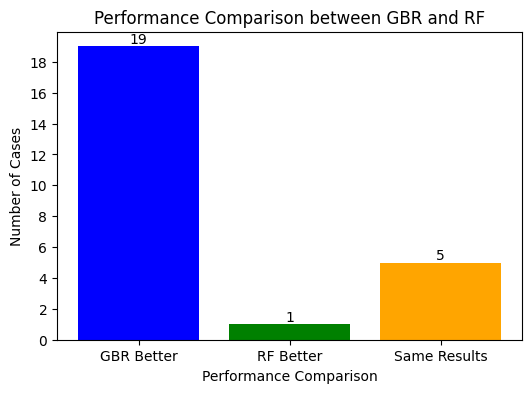

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the counts
gbr_better = 19
rf_better = 1
same_results = 5

# Labels for the bars
labels = ['GBR Better', 'RF Better', 'Same Results']

# Heights of the bars
heights = [gbr_better, rf_better, same_results]

# Calculate the maximum count rounded up to the nearest whole number
max_count = np.ceil(max(heights))

# Create the bar chart with a smaller figure size
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, heights, color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel('Performance Comparison')
plt.ylabel('Number of Cases')
plt.title('Performance Comparison between GBR and RF')

# Set y-axis ticks to only display even numbers
plt.yticks(np.arange(0, max_count + 1, 2))

# Add counts above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()
